<a href="https://colab.research.google.com/github/pablex72/time-series-crop/blob/main/Spline_%2B_Smoothing_over_gaps_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Only Spline but it doesnt filling gaps

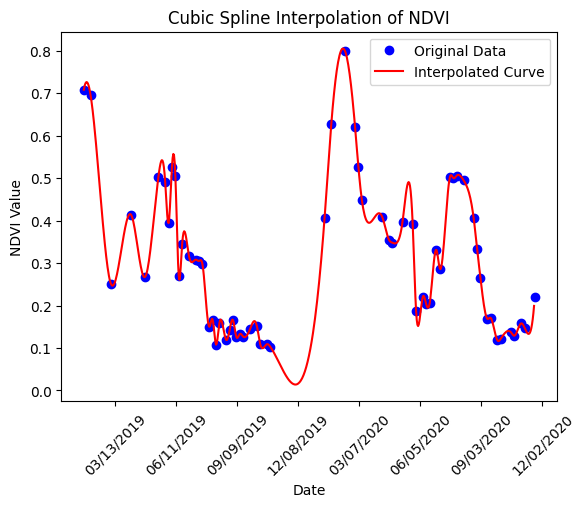

In [2]:
import numpy as np
from datetime import datetime
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input dataset
dates = np.array(["1/26/2019", "2/5/2019", "3/7/2019", "4/6/2019", "4/26/2019", "5/16/2019", "5/26/2019", "5/31/2019", "6/5/2019", "6/10/2019", "6/15/2019", "6/20/2019", "6/30/2019", "7/10/2019", "7/15/2019", "7/20/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/24/2019", "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/28/2019", "10/8/2019", "10/13/2019", "10/23/2019", "10/28/2019", "1/16/2020", "1/26/2020", "2/15/2020", "3/1/2020", "3/6/2020", "3/11/2020", "4/10/2020", "4/20/2020", "4/25/2020", "5/10/2020", "5/25/2020", "5/30/2020", "6/9/2020", "6/14/2020", "6/19/2020", "6/29/2020", "7/4/2020", "7/19/2020", "7/24/2020", "7/29/2020", "8/8/2020", "8/23/2020", "8/28/2020", "9/2/2020", "9/12/2020", "9/17/2020", "9/27/2020", "10/2/2020", "10/17/2020", "10/22/2020", "11/1/2020", "11/6/2020", "11/21/2020"])
ndvi_values = np.array([0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.394, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103, 0.405, 0.628, 0.8, 0.621, 0.525, 0.449, 0.409, 0.355, 0.348, 0.397, 0.392, 0.188, 0.221, 0.203, 0.205, 0.331, 0.287, 0.503, 0.5, 0.506, 0.495, 0.405, 0.334, 0.264, 0.169, 0.171, 0.118, 0.122, 0.137, 0.129, 0.158, 0.148, 0.22])

# Convert dates to datetime objects
dates = np.array([datetime.strptime(date, "%m/%d/%Y") for date in dates])

# Convert dates to numeric values
numeric_dates = mdates.date2num(dates)

# Sort dates and NDVI values in ascending order
sorted_indices = np.argsort(numeric_dates)
dates = dates[sorted_indices]
ndvi_values = ndvi_values[sorted_indices]

# Perform cubic spline interpolation
spline = CubicSpline(numeric_dates, ndvi_values)

# Generate interpolated numeric dates
interpolated_numeric_dates = np.arange(numeric_dates[0], numeric_dates[-1], 1)

# Compute interpolated NDVI values
interpolated_ndvi_values = spline(interpolated_numeric_dates)

# Convert interpolated numeric dates back to datetime objects
interpolated_dates = mdates.num2date(interpolated_numeric_dates)

# Plot original data points
plt.plot(dates, ndvi_values, 'bo', label='Original Data')

# Plot interpolated curve
plt.plot(interpolated_dates, interpolated_ndvi_values, 'r-', label='Interpolated Curve')

# Configure plot
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Cubic Spline Interpolation of NDVI')
plt.legend()

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))  # Show major ticks every 90 days

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Spline + Smoothing // doesnt fill yet

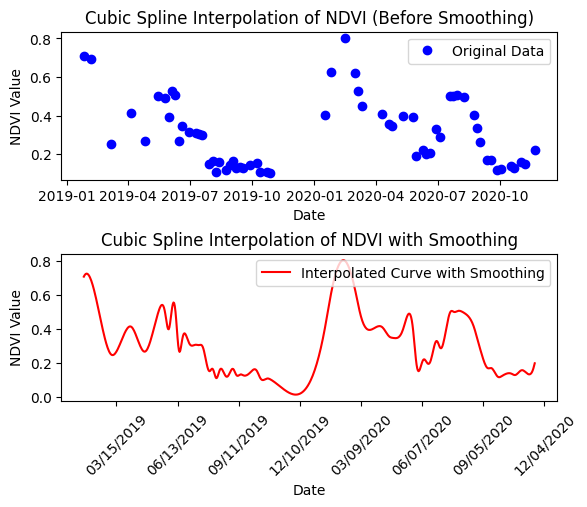

In [1]:
import numpy as np
from datetime import datetime
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input dataset
dates = np.array(["1/26/2019", "2/5/2019", "3/7/2019", "4/6/2019", "4/26/2019", "5/16/2019", "5/26/2019", "5/31/2019", "6/5/2019", "6/10/2019", "6/15/2019", "6/20/2019", "6/30/2019", "7/10/2019", "7/15/2019", "7/20/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/24/2019", "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/28/2019", "10/8/2019", "10/13/2019", "10/23/2019", "10/28/2019", "1/16/2020", "1/26/2020", "2/15/2020", "3/1/2020", "3/6/2020", "3/11/2020", "4/10/2020", "4/20/2020", "4/25/2020", "5/10/2020", "5/25/2020", "5/30/2020", "6/9/2020", "6/14/2020", "6/19/2020", "6/29/2020", "7/4/2020", "7/19/2020", "7/24/2020", "7/29/2020", "8/8/2020", "8/23/2020", "8/28/2020", "9/2/2020", "9/12/2020", "9/17/2020", "9/27/2020", "10/2/2020", "10/17/2020", "10/22/2020", "11/1/2020", "11/6/2020", "11/21/2020"])
ndvi_values = np.array([0.708, 0.695, 0.251, 0.413, 0.267, 0.503, 0.491, 0.394, 0.527, 0.505, 0.269, 0.344, 0.317, 0.308, 0.305, 0.297, 0.15, 0.167, 0.108, 0.159, 0.119, 0.142, 0.166, 0.126, 0.133, 0.127, 0.144, 0.153, 0.11, 0.109, 0.103, 0.405, 0.628, 0.8, 0.621, 0.525, 0.449, 0.409, 0.355, 0.348, 0.397, 0.392, 0.188, 0.221, 0.203, 0.205, 0.331, 0.287, 0.503, 0.5, 0.506, 0.495, 0.405, 0.334, 0.264, 0.169, 0.171, 0.118, 0.122, 0.137, 0.129, 0.158, 0.148, 0.22])

# Convert dates to datetime objects
dates = np.array([datetime.strptime(date, "%m/%d/%Y") for date in dates])

# Convert dates to numeric values
numeric_dates = mdates.date2num(dates)

# Sort dates and NDVI values in ascending order
sorted_indices = np.argsort(numeric_dates)
dates = dates[sorted_indices]
ndvi_values = ndvi_values[sorted_indices]

# Perform cubic spline interpolation
spline = CubicSpline(numeric_dates, ndvi_values)

# Generate interpolated numeric dates
interpolated_numeric_dates = np.arange(numeric_dates[0], numeric_dates[-1], 1)

# Compute interpolated NDVI values
interpolated_ndvi_values = spline(interpolated_numeric_dates)

# Apply Savitzky-Golay filter for smoothing
window_length = 9  # Choose an odd number for the window length
polyorder = 2  # Choose the order of the polynomial to fit
smoothed_ndvi_values = savgol_filter(interpolated_ndvi_values, window_length, polyorder)

# Convert interpolated numeric dates back to datetime objects
interpolated_dates = mdates.num2date(interpolated_numeric_dates)

# Plot original data points
plt.subplot(2, 1, 1)
plt.plot(dates, ndvi_values, 'bo', label='Original Data')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Cubic Spline Interpolation of NDVI (Before Smoothing)')
plt.legend()

# Plot interpolated curve
plt.subplot(2, 1, 2)
plt.plot(interpolated_dates, smoothed_ndvi_values, 'r-', label='Interpolated Curve with Smoothing')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Cubic Spline Interpolation of NDVI with Smoothing')
plt.legend()

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))  # Show major ticks every 90 days

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


# Interpolation Transformer Fourier doesnt fill yet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

df = pd.read_csv('/content/s2-r2-2019-2022-correct-2.csv')

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Interpolate missing values using Two-term Fourier (TF) interpolation
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
interpolated_values = []

for x_i in x:
    if not mask[x_i]:
        x_near = x[mask]
        y_near = df["NDVI"][mask]
        f = interp1d(x_near, y_near, kind='linear')
        interpolated_value = f(x_i)
        interpolated_values.append(interpolated_value)
    else:
        interpolated_values.append(df["NDVI"][x_i])

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Plot the original and interpolated datasets
plt.figure(figsize=(12, 6))

# Plot interpolated dataset
plt.plot(df["Date"], interpolated_values, "o-", label="Interpolated (TF)")

# Plot original data
plt.plot(df["Date"], df["NDVI"], "x-", label="Original", color="yellow")

plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original and Interpolated NDVI Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
